In [410]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# loading Data

In [605]:
df=pd.read_csv('D:\SHAI Training\Salaries.csv')

In [514]:
df.shape

(148654, 13)

In [515]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Displaying columns data types

In [516]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [517]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

# checking data for missing and null values

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [519]:
df.duplicated().sum()

0

##### we notice that there isn't dublicated values.

In [520]:
df['Benefits']=df['Benefits'].replace('Not provided',np.nan)

In [521]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

<Axes: >

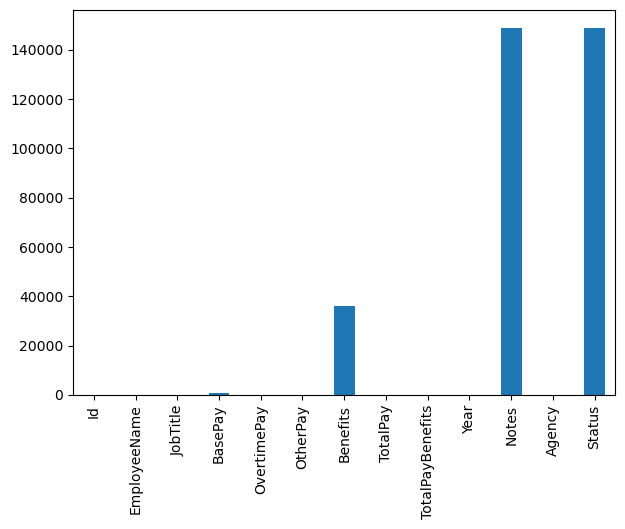

In [522]:
df.isnull().sum().plot.bar(figsize=(7,5))

#### Issues:
* Delete 'Notes' & 'Status', as they are empty columns.

### Removing null values and preprocessing:

In [523]:
#delete the empty columns: 'Notes' & 'Status'
df.drop(['Notes','Status'], axis=1, inplace=True)

In [524]:
#Remove irrelevant columns
df.drop(['Id','Agency'], axis=1, inplace=True)

In [525]:
#Drop the rows having 8 missing values
df.drop(df[df.isnull().sum(axis=1)==8].index,axis=0,inplace=True)

In [526]:
# Fill missing values with 0
df=df.fillna(0) 

In [527]:
df['Year']=df['Year'].astype(str)

In [528]:
df.sample(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
49459,James Cecil,Automotive Machinist,74293.13,12434.38,1327.40,33259.00,88054.91,121313.91,2012
63745,Latoya Jenkins,Home Health Aide,30469.28,1685.75,981.04,18437.51,33136.07,51573.58,2012
47881,Benjamin Tanner,Emergency Med Svcs Agency Spec,91601.40,0.00,1250.61,35470.86,92852.01,128322.87,2012
9069,MIKE MCGLINCHY,ELECTRONIC MAINTENANCE TECHNICIAN,99014.40,2311.20,1075.50,0.00,102401.10,102401.10,2011
17837,JUAN JONES,SEWER MAINTENANCE WORKER,61537.64,6358.90,961.98,0.00,68858.52,68858.52,2011


In [529]:
df.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

# EDA

In [530]:
df.describe().round(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148654.000,148654.000,148654.000,148654.000,148654.000,148654.000
mean,66053.729,5065.924,3648.669,18924.233,74768.322,93692.555
std,42886.711,11454.257,8056.516,17165.279,50517.005,62793.533
min,-166.010,-0.010,-7058.590,-33.890,-618.130,-618.130
25%,32792.545,0.000,0.000,0.000,36168.995,44065.650
50%,64861.600,0.000,811.170,23214.020,71426.610,92404.090
75%,94605.740,4657.632,4235.908,33468.980,105839.135,132876.450
max,319275.010,245131.880,400184.250,96570.660,567595.430,567595.430


### conclusion for numerical Data:
+ we note that the average of `salaries(TotalPay)` is 74768.322.
+ we also note that the average of `OverTimePay` is 5065.924

In [531]:
df.describe(include=['object'])

,EmployeeName,JobTitle,Year
count,148654,148654,148654
unique,110811,2159,4
top,Kevin Lee,Transit Operator,2014
freq,13,7036,38123


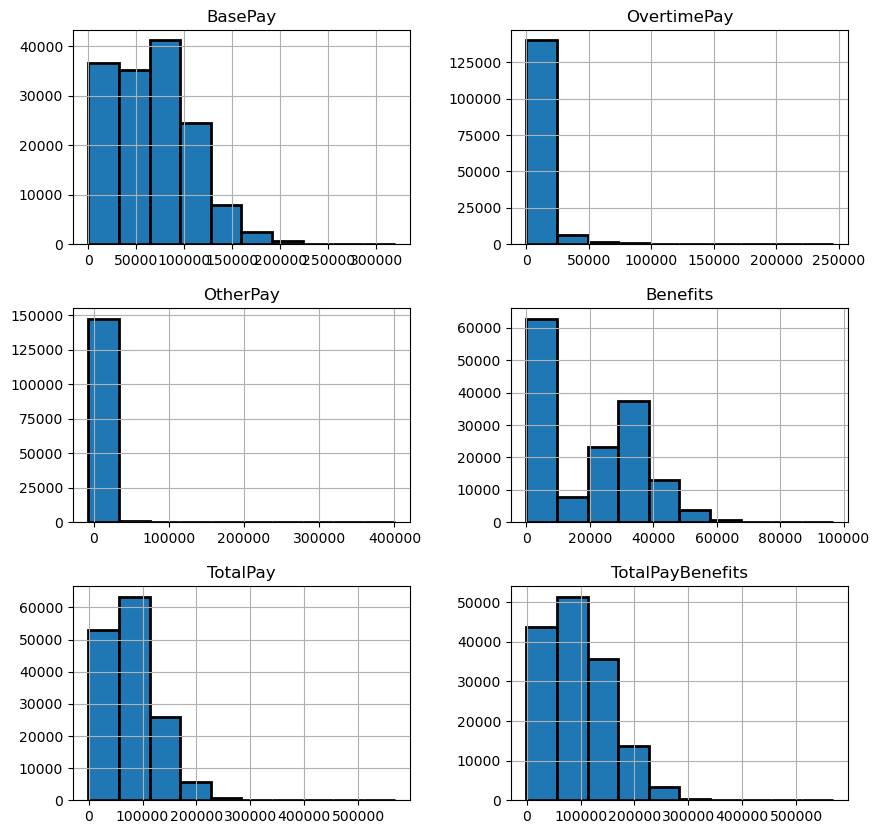

In [532]:
df[df.columns].hist(figsize=(10,10),edgecolor='black',linewidth=2)
plt.show()

* As we see most features have a right skew.
* This means that there are outliers affecting the data for each feature.

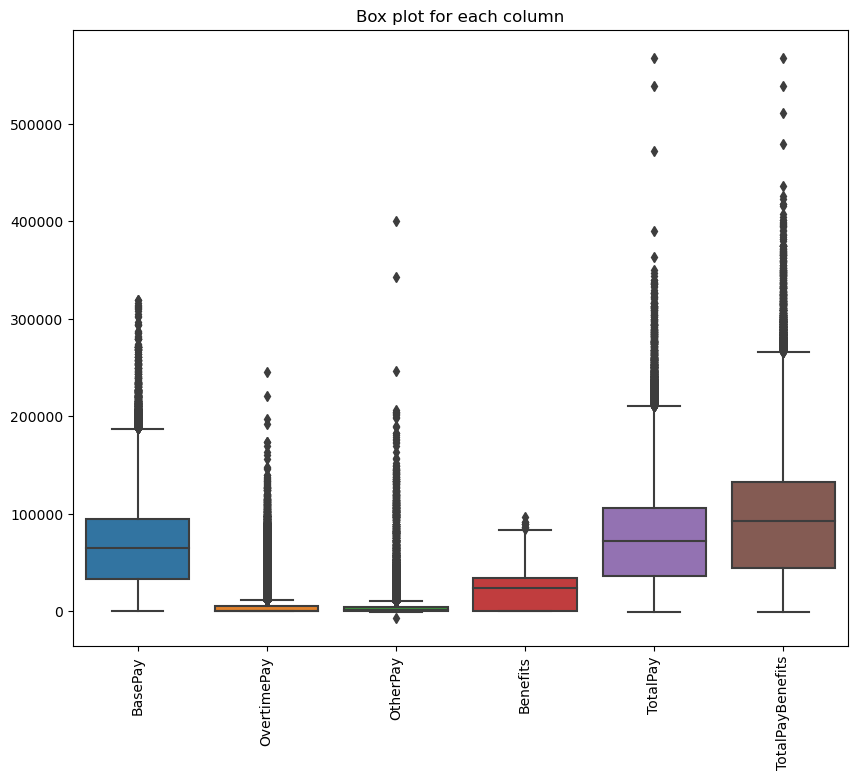

In [533]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box plot for each column')
plt.xticks(rotation=90)
plt.show()

C:\Users\rmdan\AppData\Local\Temp\ipykernel_11720\3867150519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


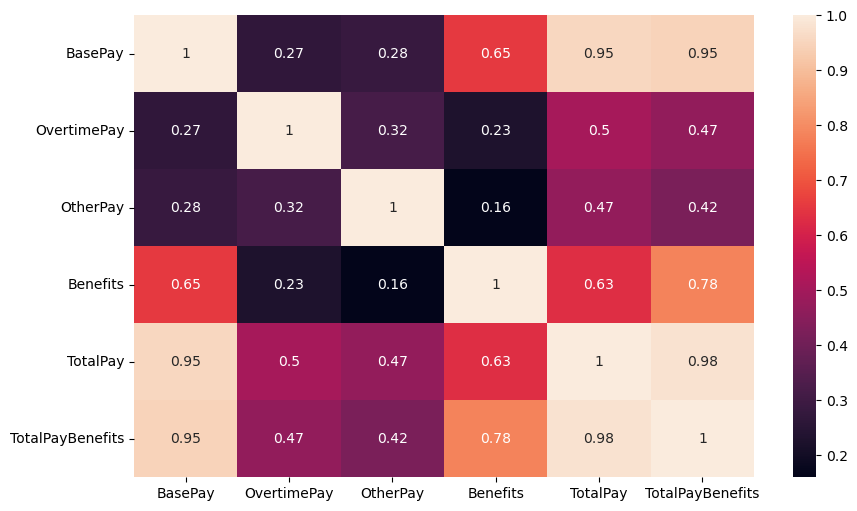

In [534]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### As we see:
* `TotalPay` column has strength relationships with each of `BasePay`, `Benefits`,and  `TotalPayBenefits` columns 

In [535]:
df.TotalPay.describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [536]:
df["TotalPay"].var()

2551967821.8482866

### What is the name of the person with the highest TotalPay?

In [537]:
df[df['TotalPay']==567595.43]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### what's the job title with the highest TotalPay?

In [538]:
max_jobTitle_salary = df[df['TotalPay'] == 567595.43]['JobTitle']
max_jobTitle_salary

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

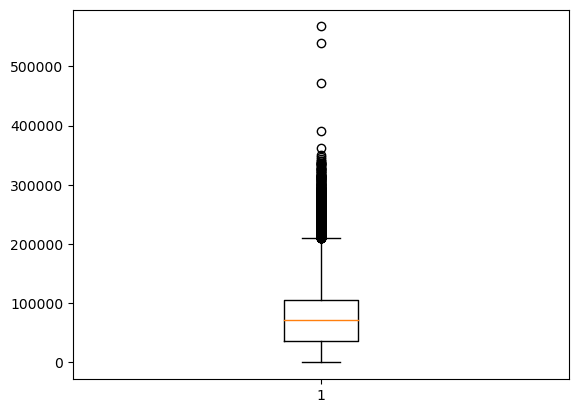

In [539]:
plt.boxplot(df["TotalPay"])
plt.show()

#### handling  outliers in TotalPay column:
+ if outliers are high we will make them equal to (max or min).
+ if outliers are small we will remove them.

In [540]:
q1 = df['TotalPay'].quantile(0.25)
q3 = df['TotalPay'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_num = df[(df['TotalPay'] < lower_bound) | (df['TotalPay'] > upper_bound)]
len(outliers_num)

1286

In [541]:
df['TotalPay'].count()

148654

#### As we see outliers are very small so we will remove them.

In [542]:
df = df[~df.index.isin(outliers_num.index)]
df['TotalPay'].count()

147368

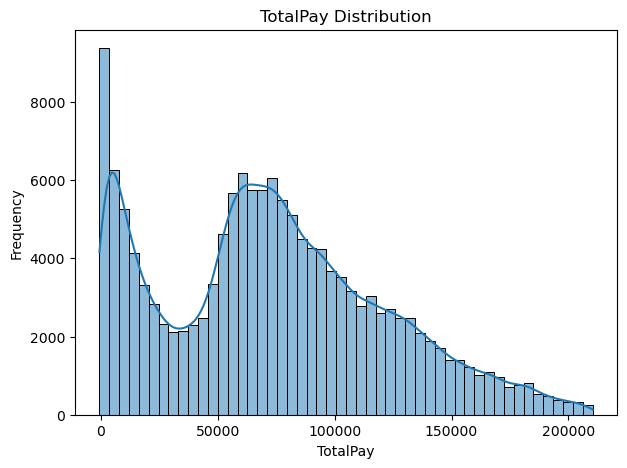

In [543]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='TotalPay',bins=50, kde=True)
plt.title('TotalPay Distribution')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()

#### This is a Bimodel Distribution we will deal with that by separating this data into 2 groups: GA & GB

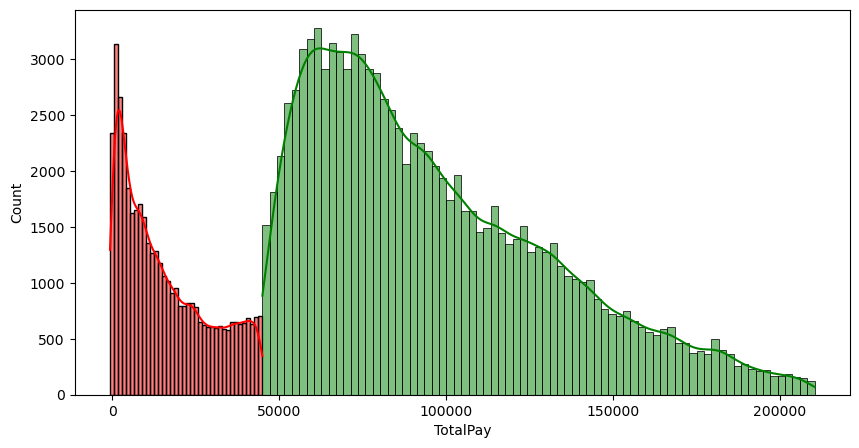

In [544]:
A = df['TotalPay'][df['TotalPay'] < 45000]
B = df['TotalPay'][df['TotalPay'] > 45000]
plt.figure(figsize=(10, 5))
sns.histplot(A, legend=True, color='red', kde=True)
sns.histplot(B, legend=True, color='green', kde=True)
plt.show()

In [545]:
print(f'Group A mean: {A.mean()}')
print(f'Group B mean: {B.mean()}')
print('-' * 50)
print(f'Group A median: {A.median()}')
print(f'Group B median: {B.median()}')

Group A mean: 15764.224345674314
Group B mean: 96320.71463869374
--------------------------------------------------
Group A median: 12128.349999999999
Group B median: 87624.56


#### Here the median is more accurate than the mean because the two groups are skewed to right

In [546]:
df.BasePay.describe()

count    147368.000000
mean      65168.383239
std       41754.046511
min        -166.010000
25%       32230.017500
50%       64622.230000
75%       93930.395000
max      210294.150000
Name: BasePay, dtype: float64

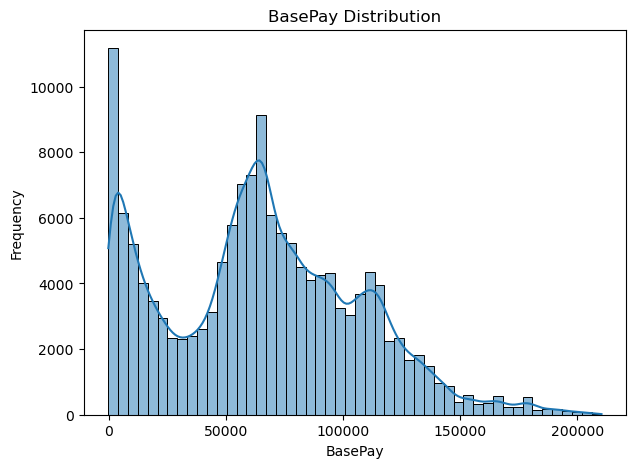

In [547]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='BasePay',bins=50, kde=True)
plt.title('BasePay Distribution')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

In [548]:
df.Benefits.describe()

count    147368.000000
mean      18697.107585
std       16955.797002
min         -33.890000
25%           0.000000
50%       22847.330000
75%       33310.180000
max       71603.130000
Name: Benefits, dtype: float64

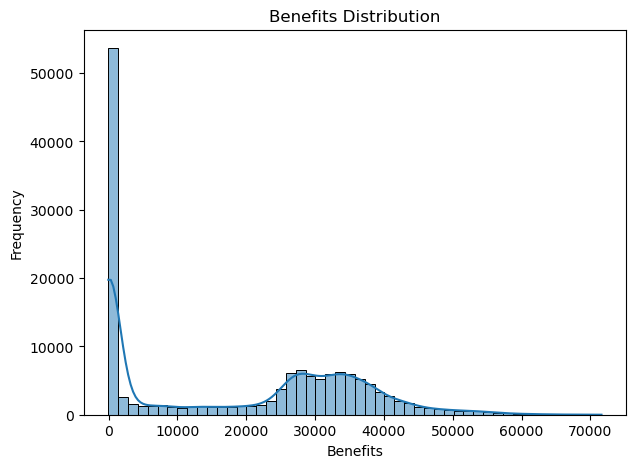

In [549]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='Benefits',bins=50, kde=True)
plt.title('Benefits Distribution')
plt.xlabel('Benefits')
plt.ylabel('Frequency')
plt.show()

In [550]:
df.TotalPayBenefits.describe()

count    147368.000000
mean      92043.851117
std       60417.239704
min        -618.130000
25%       43309.322500
50%       91859.230000
75%      131587.190000
max      279997.930000
Name: TotalPayBenefits, dtype: float64

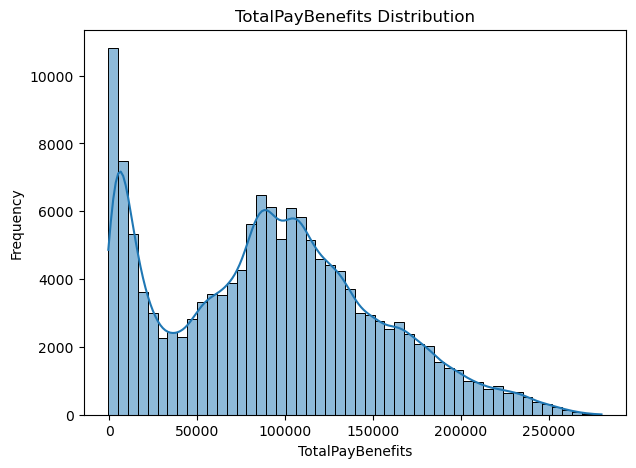

In [551]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='TotalPayBenefits',bins=50, kde=True)
plt.title('TotalPayBenefits Distribution')
plt.xlabel('TotalPayBenefits')
plt.ylabel('Frequency')
plt.show()

### What is the highest amount of OvertimePay in the dataset ?

In [609]:
df['OvertimePay'].max()

245131.88

### How many unique job titles are there?

In [610]:
df.JobTitle.nunique()

1637

In [611]:
df['JobTitle'].value_counts()

transit operator                                      9424
special nurse                                         5791
registered nurse                                      4955
custodian                                             3214
firefighter                                           3153
                                                      ... 
executive assistant to the general manager, retire       1
animal care assistant supervisor                         1
media/security systems supervisor                        1
chief microbiologist                                     1
secretary,juvenile probation commission                  1
Name: JobTitle, Length: 1637, dtype: int64

In [606]:
df['JobTitle'] = df['JobTitle'].str.lower()

### What was the average Total Pay Of all employees per year (2011-2014) ?

In [612]:
avg_year_salaries=df.groupby('Year')['TotalPay'].mean()
avg_year_salaries

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

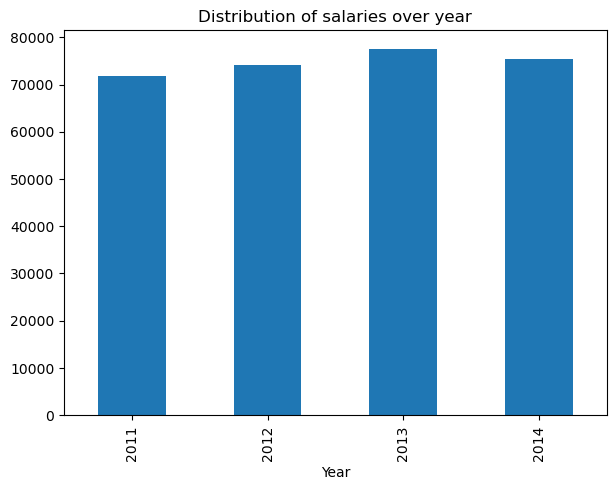

In [613]:
avg_year_salaries.plot.bar(figsize=(7,5))
plt.title('Distribution of salaries over year')
plt.show()

### What are the top 10 most common jobs?

In [614]:
df['JobTitle'].value_counts().head(10)

transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64

### How many Job Titles were represented by only one person in 2013? (Job Titles with only one occurence in 2013?)

In [596]:
df_2013 = df[df['Year'] == 2013]

In [598]:
jobs_num = df_2013['JobTitle'].value_counts()

In [602]:
one_per = jobs_num[jobs_num == 1]

In [603]:
len(one_per)

202

### How many people have the word Chief in their job title?

In [607]:
sum(df['JobTitle'].str.contains('chief'))

627

### Display all the employee names whose job title contains chief word:

In [608]:
df[df['JobTitle'].str.contains('chief',case=False)]['EmployeeName']

4             PATRICK GARDNER
5              DAVID SULLIVAN
6                   ALSON LEE
8              MICHAEL MORRIS
9          JOANNE HAYES-WHITE
                 ...         
138011       Sharon C Jackson
139620            Anita S Lee
139709       George D Vaughan
140080    Patrick W Gillespie
140156    Christopher L Ochoa
Name: EmployeeName, Length: 627, dtype: object